In [35]:
#importing libraries to connect to bigquery and convert to df
from google.cloud import bigquery
from google.oauth2 import service_account
import os
import db_dtypes

#libraries to manipulate data
import pandas as pd
from datetime import datetime
import numpy as np

#libraries for visualisation
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#libraries for stats analysis
from scipy import stats
import statistics
from sklearn.impute import SimpleImputer

# Importing Data

In [45]:
df1 = pd.read_excel("./ecommerceData.xlsx", sheet_name = 'E Comm')
df2 = pd.read_excel("./ecommerceData.xlsx", header=1,sheet_name = 'Data Dict')

# Preview Data

In [46]:
df1.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [47]:
df2.head()

,Unnamed: 0,Data,Variable,Discerption
0,NaN,E Comm,CustomerID,Unique customer ID
1,NaN,E Comm,Churn,Churn Flag
2,NaN,E Comm,Tenure,Tenure of customer in organization
3,NaN,E Comm,PreferredLoginDevice,Preferred login device of customer
4,NaN,E Comm,CityTier,City tier


In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [49]:
df1.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [50]:
df1 = df1.drop('CustomerID', axis=1)

In [51]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00


# Imputing missing values

In [52]:
# Replace NaN values in numerical columns with mean
numerical_cols = df1.select_dtypes(include=['float64', 'int64']).columns
df1[numerical_cols] = df1[numerical_cols].fillna(df1[numerical_cols].mean())

In [53]:
# Replace NaN values in categorical columns with mode
categorical_cols = df1.select_dtypes(include='object').columns
df1[categorical_cols] = df1[categorical_cols].fillna(df1[categorical_cols].mode().iloc[0])

# Visualise Data

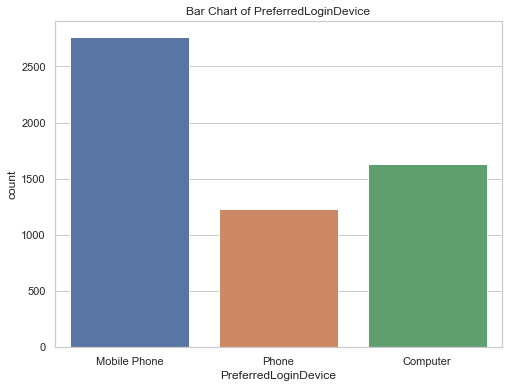

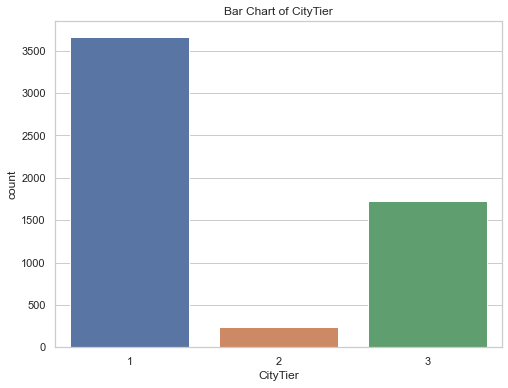

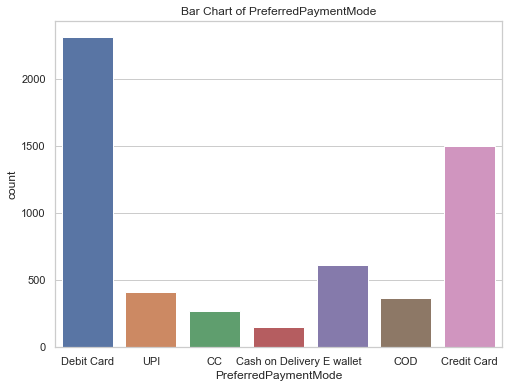

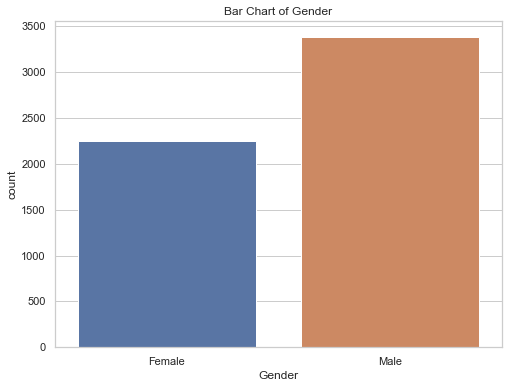

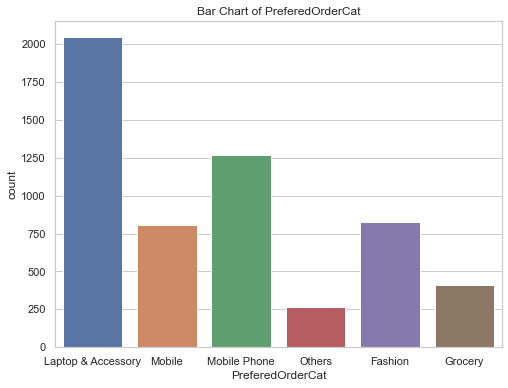

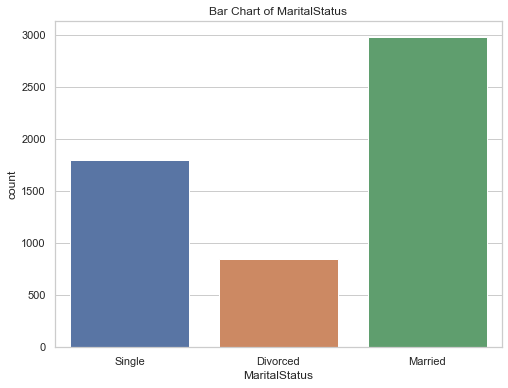

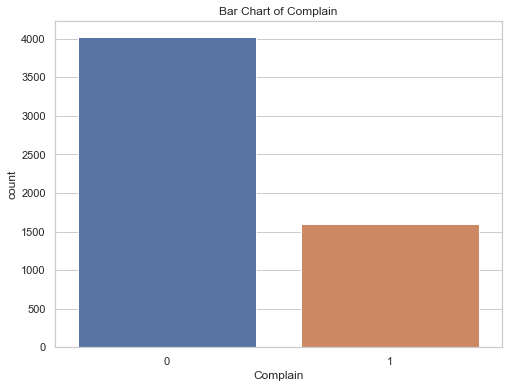

In [65]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Bar Charts
categorical_vars = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Complain']

for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var, data=df1)
    plt.title(f'Bar Chart of {var}')
    plt.show()



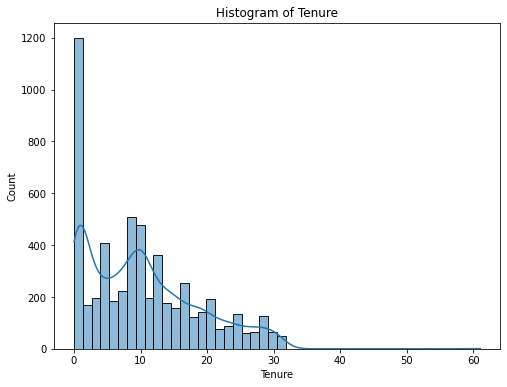

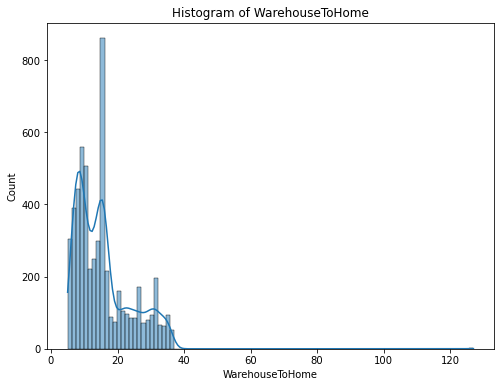

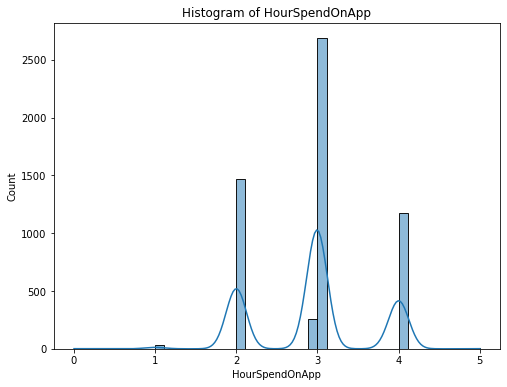

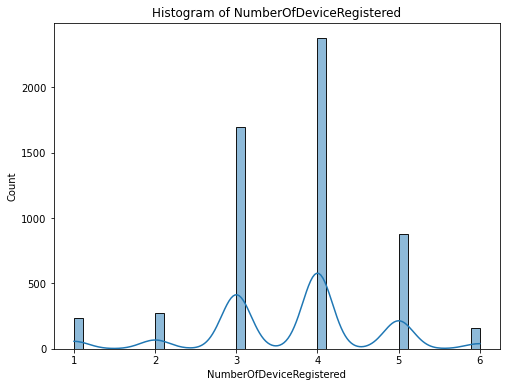

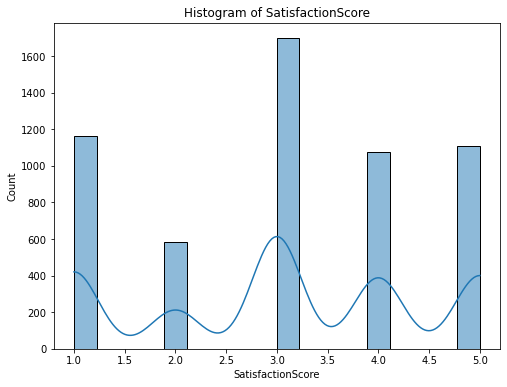

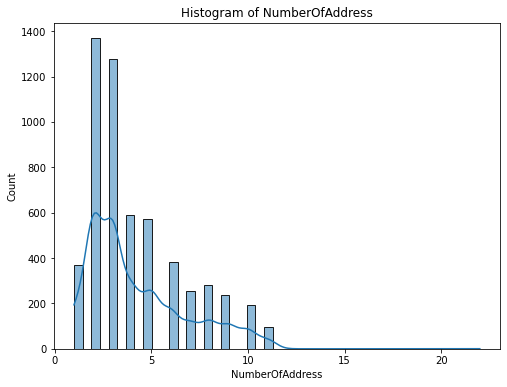

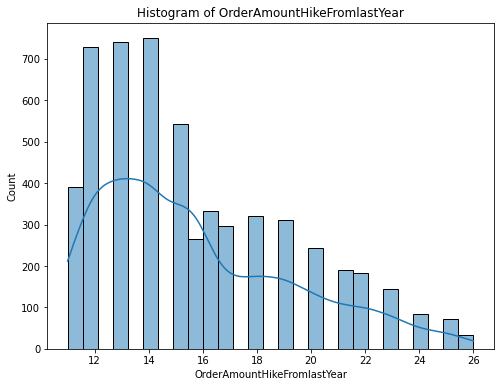

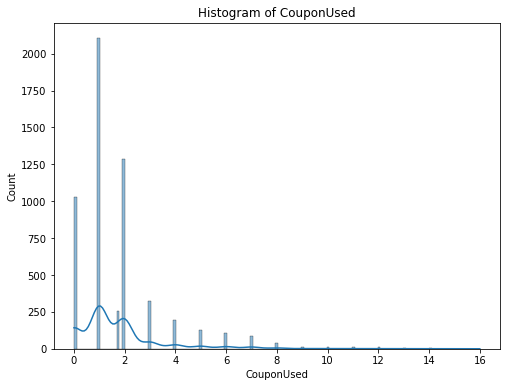

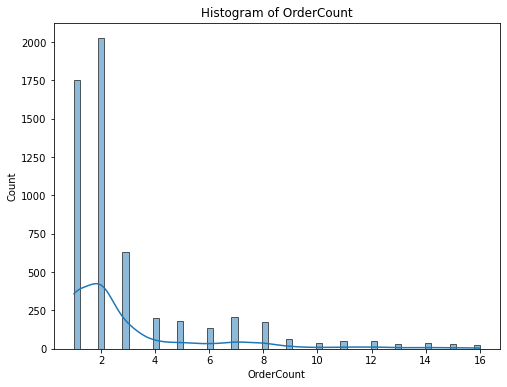

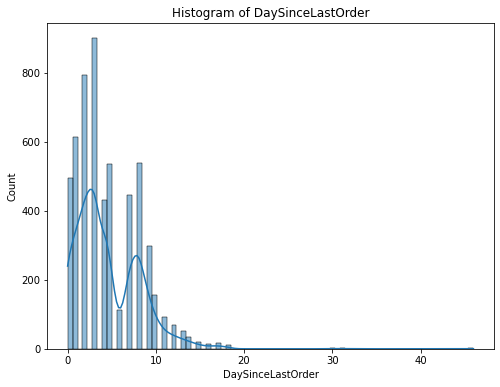

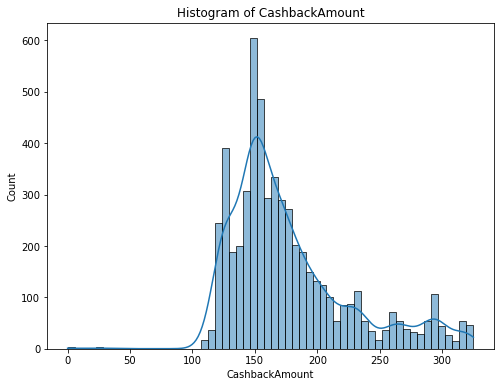

In [57]:
# Histograms
numerical_vars = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
                  'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(df1[var], kde=True)
    plt.title(f'Histogram of {var}')
    plt.show()

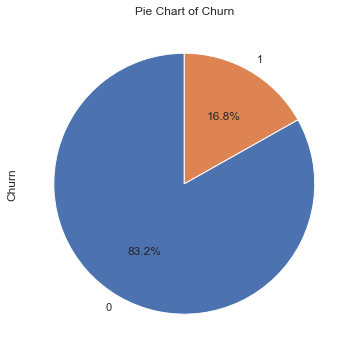

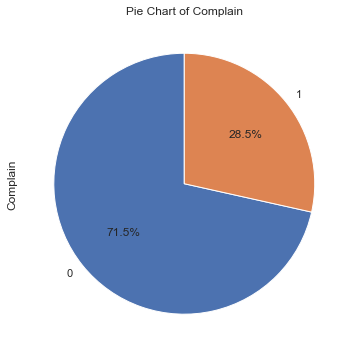

In [66]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Pie Charts
for var in ['Churn', 'Complain']:
    plt.figure(figsize=(6, 6))
    df1[var].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {var}')
    plt.show()

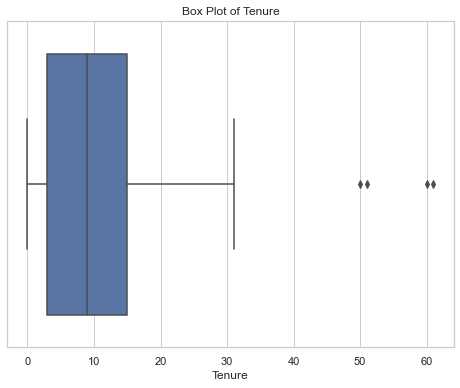

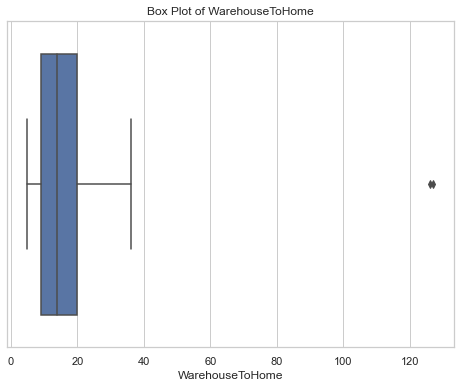

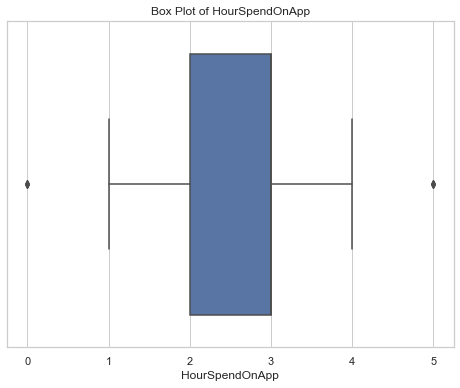

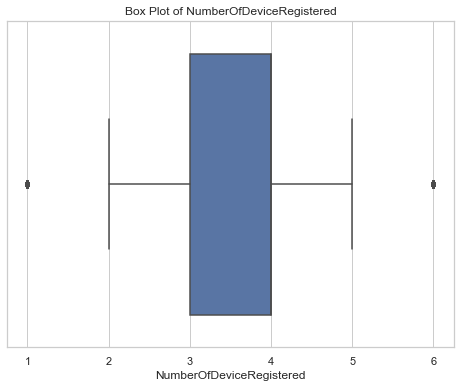

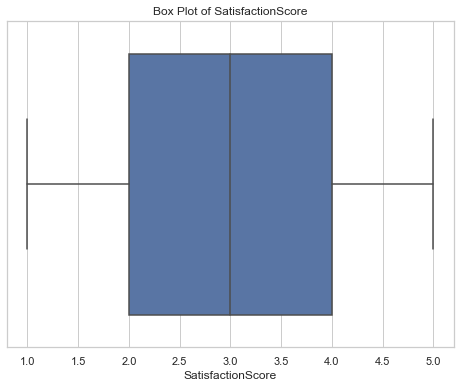

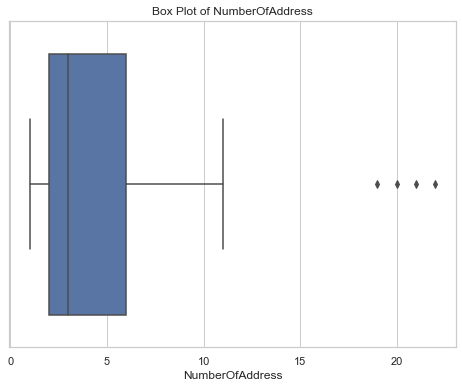

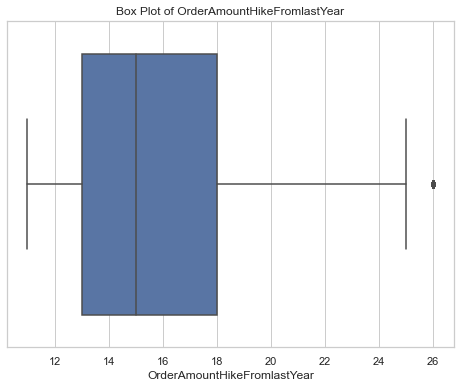

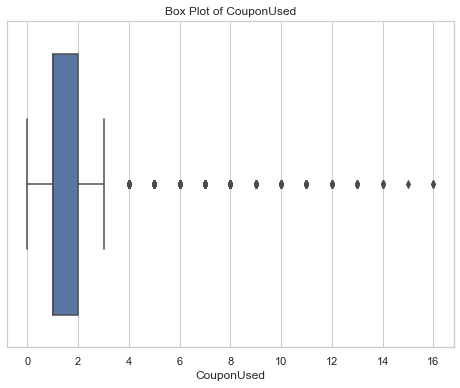

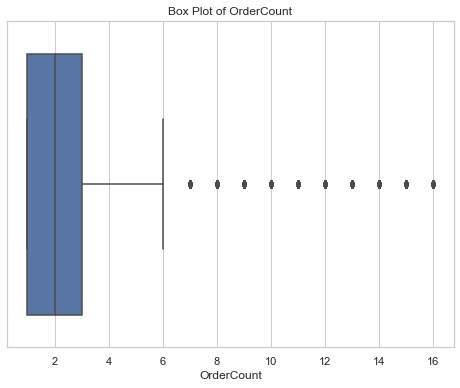

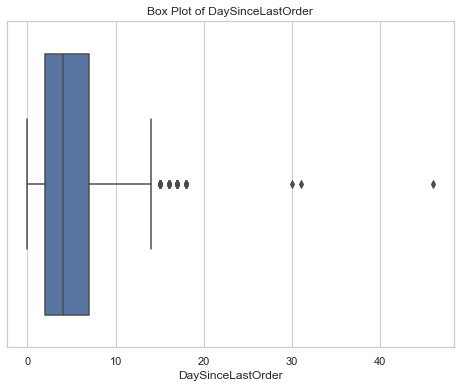

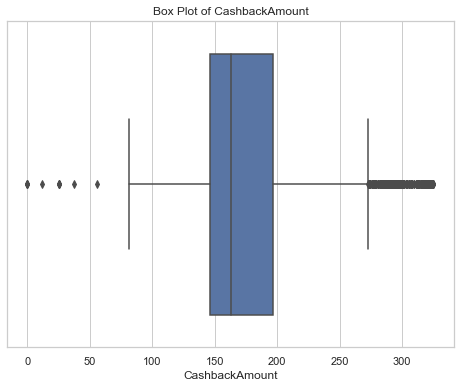

In [67]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Box Plots
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=var, data=df1)
    plt.title(f'Box Plot of {var}')
    plt.show()

<Figure size 720x576 with 0 Axes>

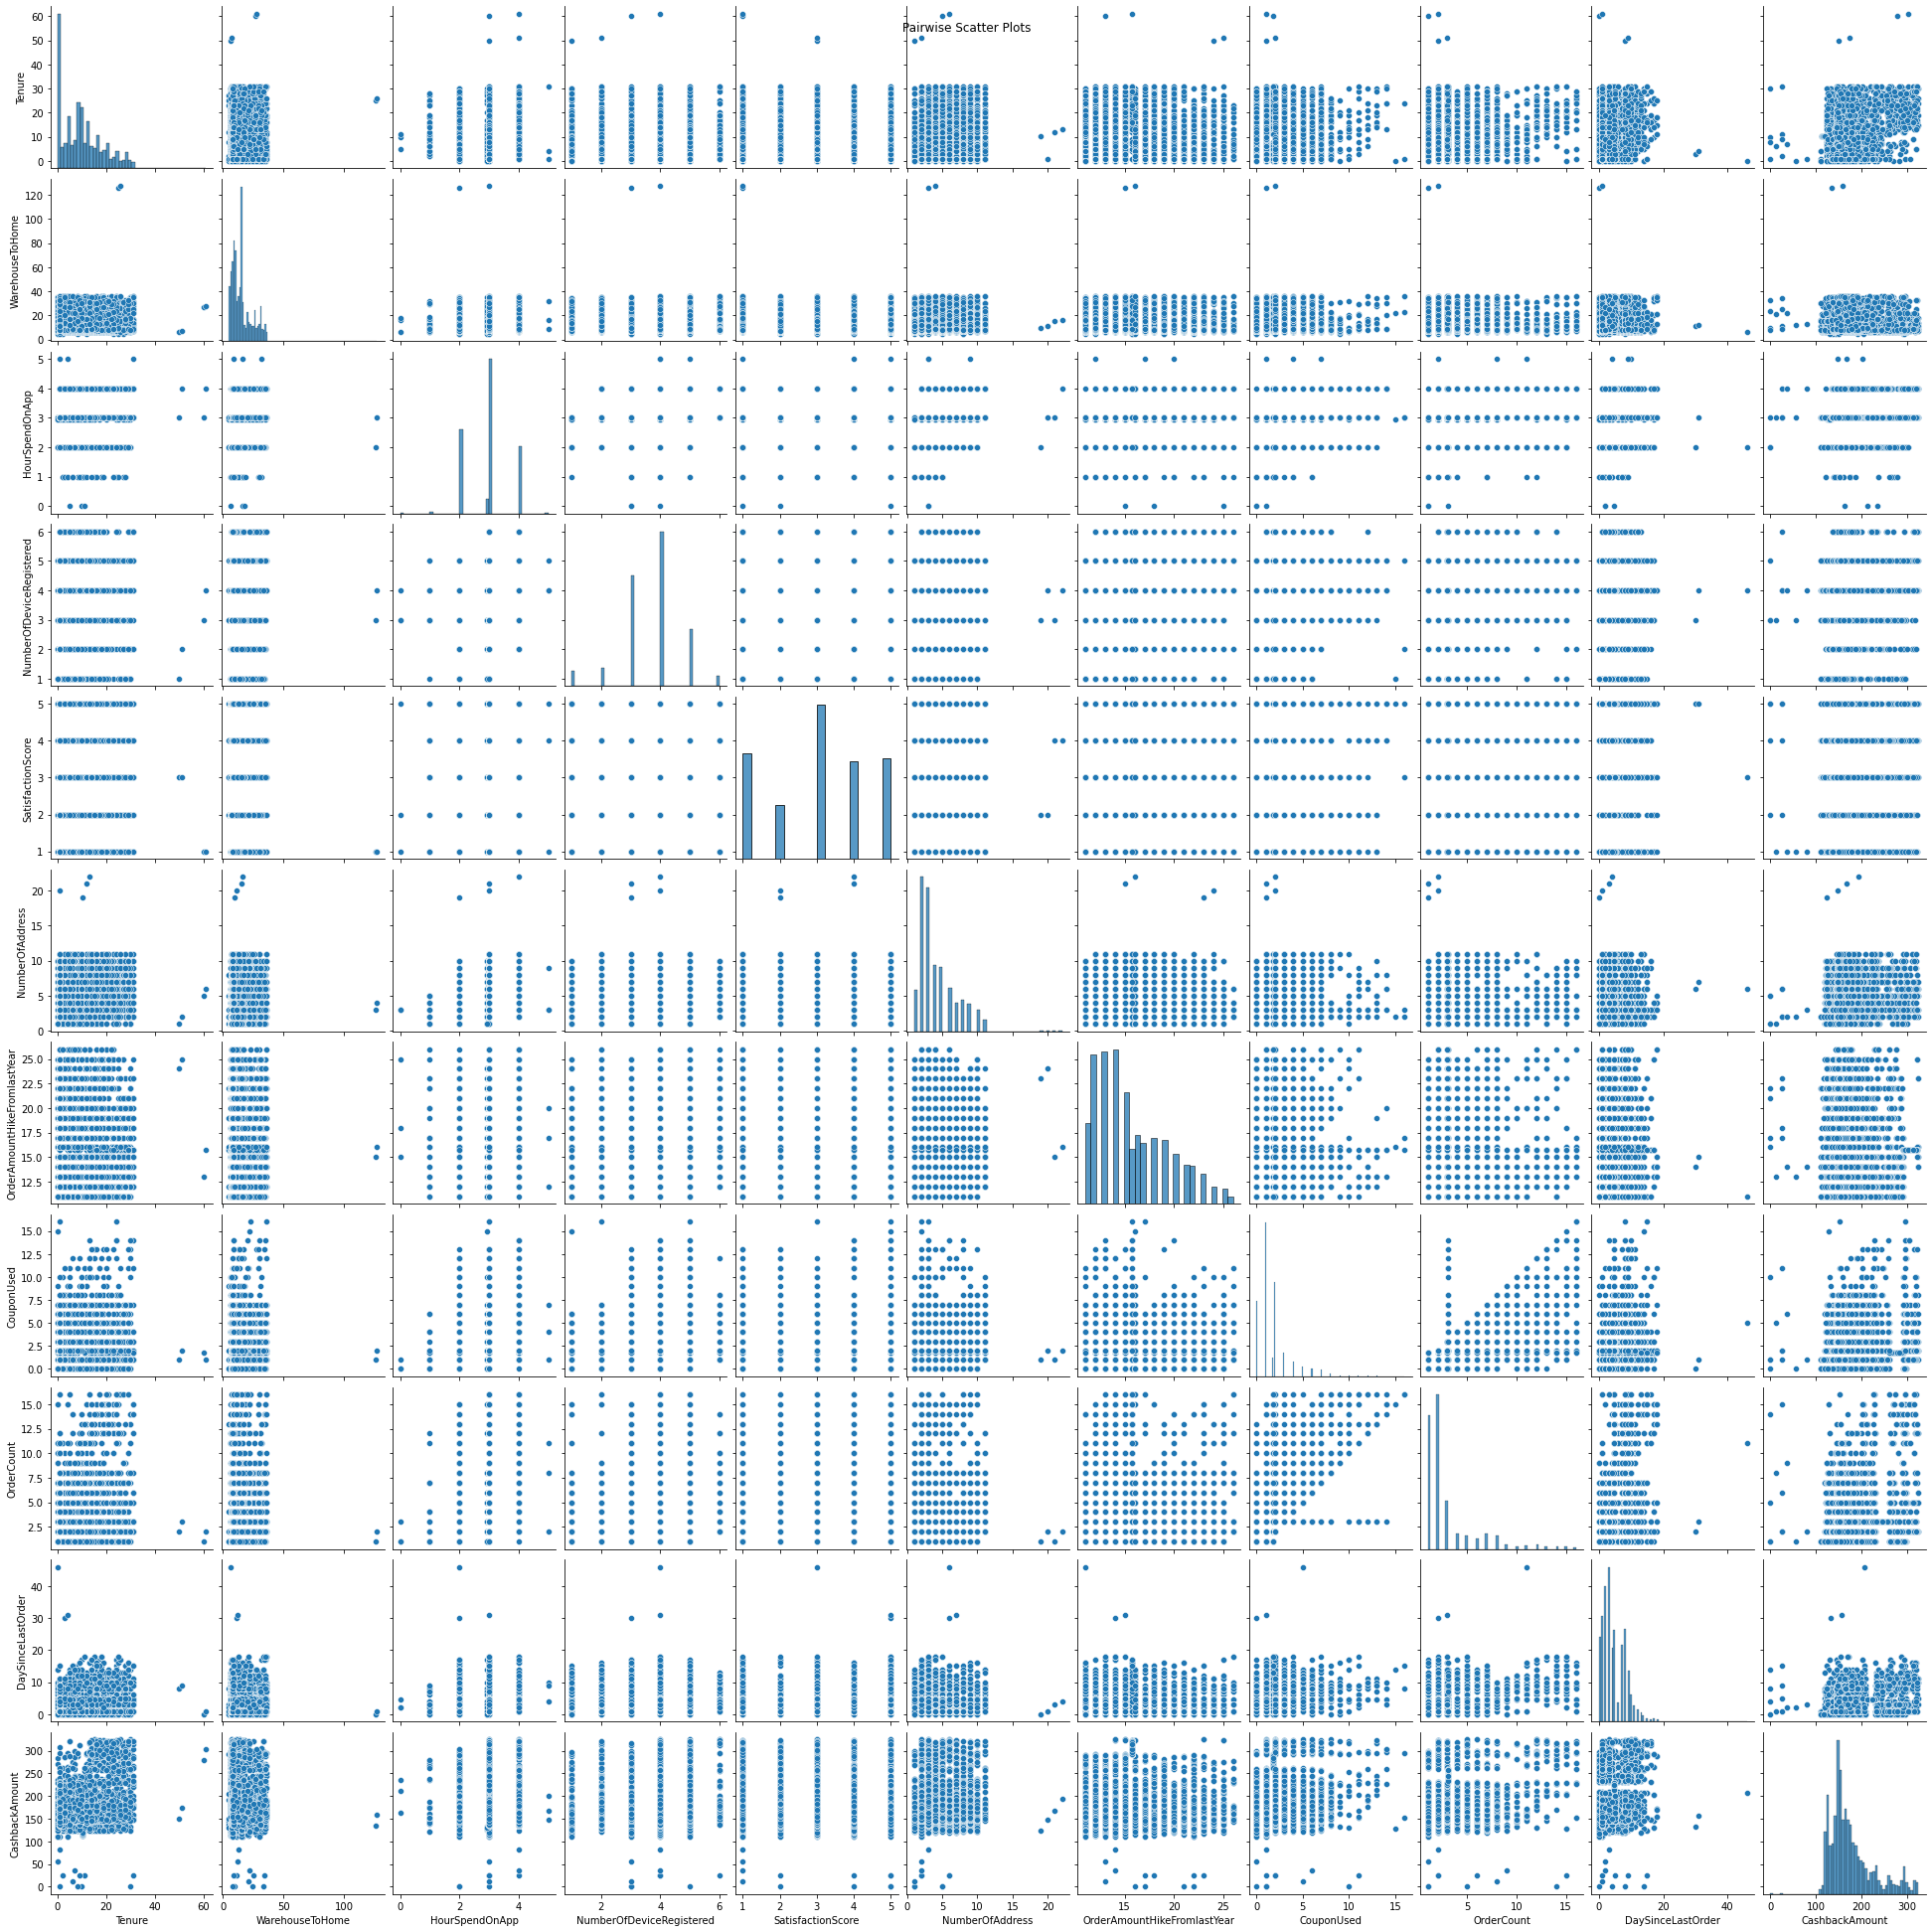

In [60]:
# Scatter Plots
plt.figure(figsize=(10, 8))
sns.pairplot(df1, vars=numerical_vars)
plt.suptitle('Pairwise Scatter Plots')
plt.show()

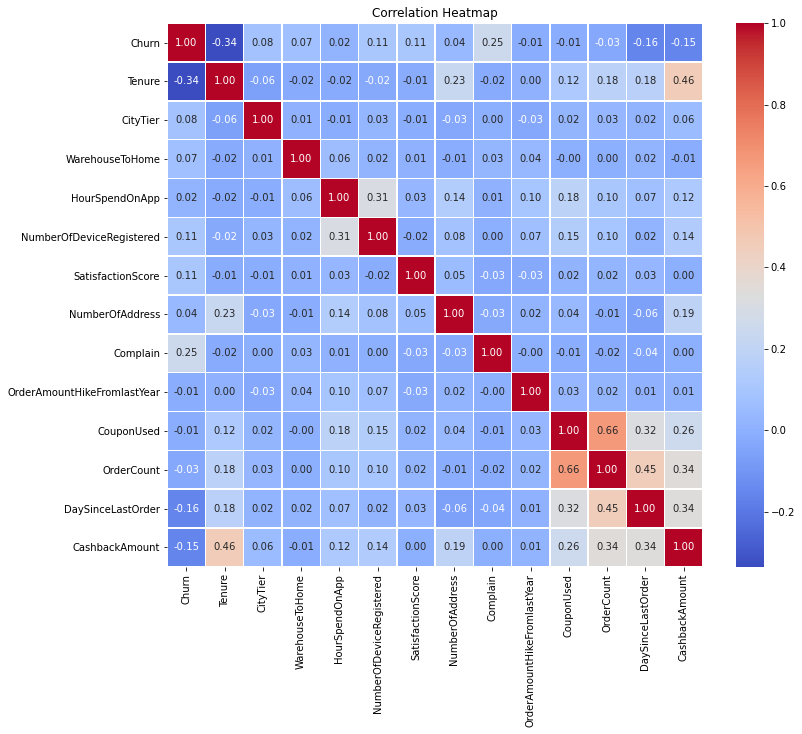

In [61]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

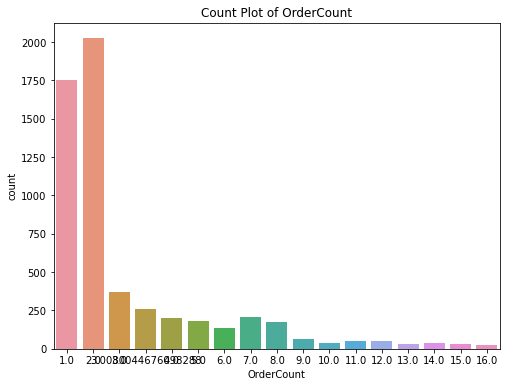

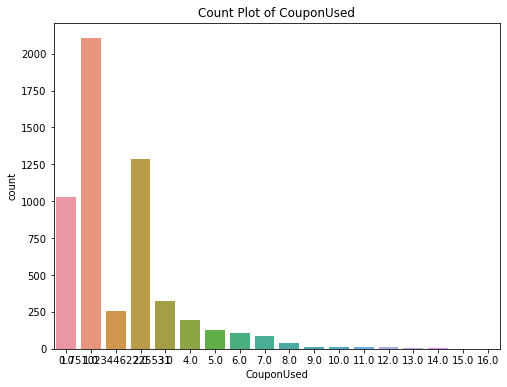

In [62]:

# Count Plots
for var in ['OrderCount', 'CouponUsed']:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var, data=df1)
    plt.title(f'Count Plot of {var}')
    plt.show()

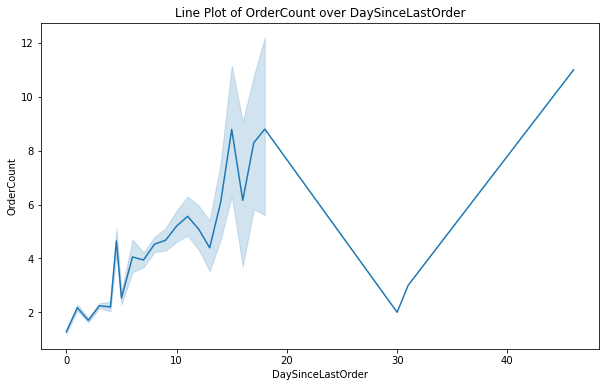

In [63]:
# Line Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='DaySinceLastOrder', y='OrderCount', data=df1)
plt.title('Line Plot of OrderCount over DaySinceLastOrder')
plt.show()

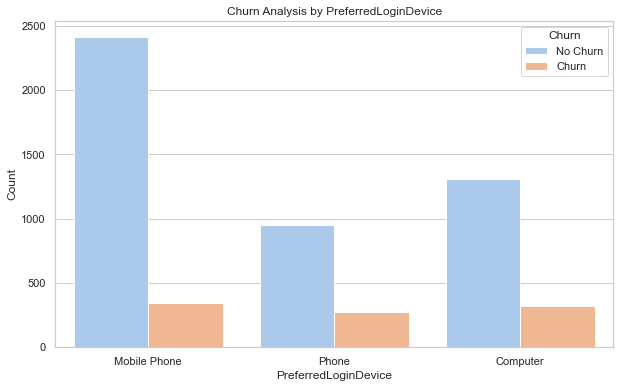

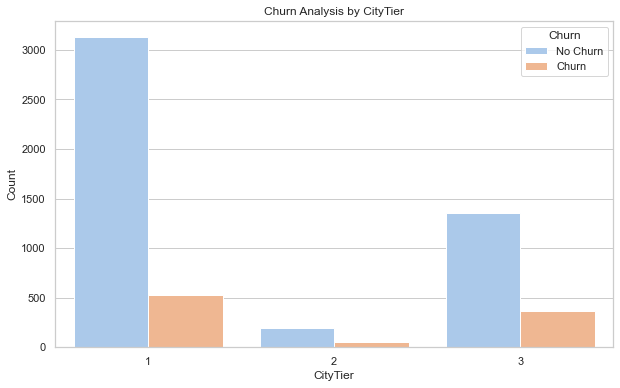

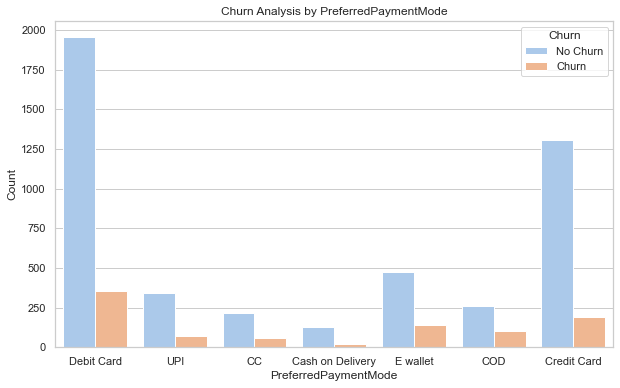

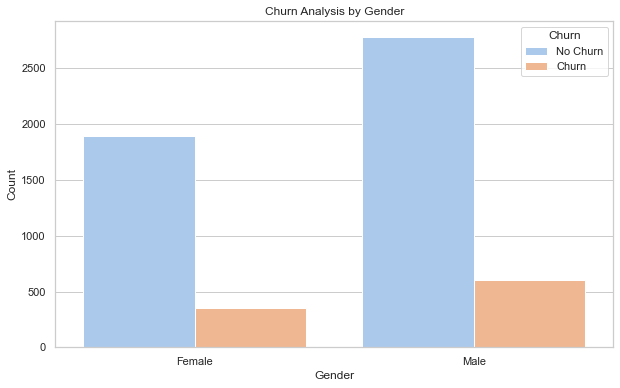

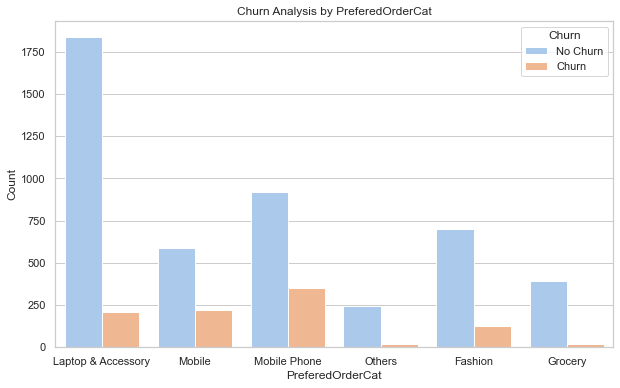

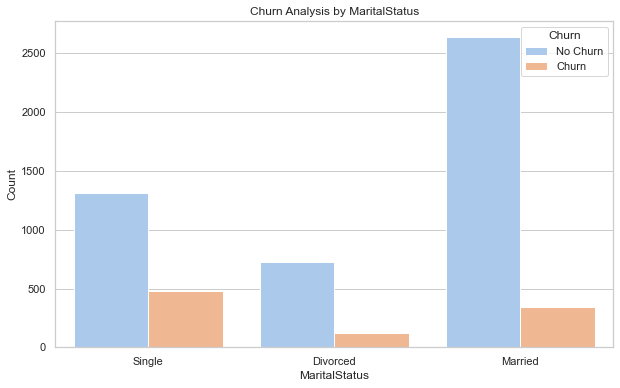

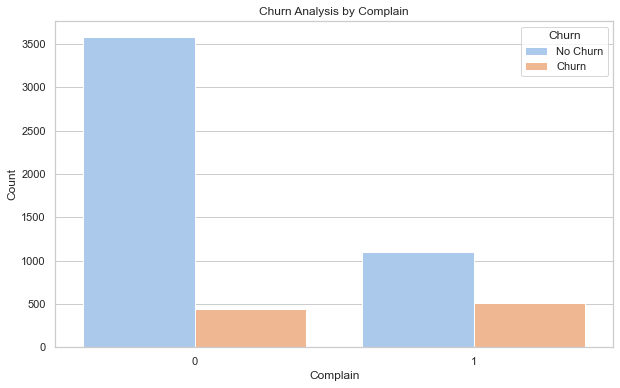

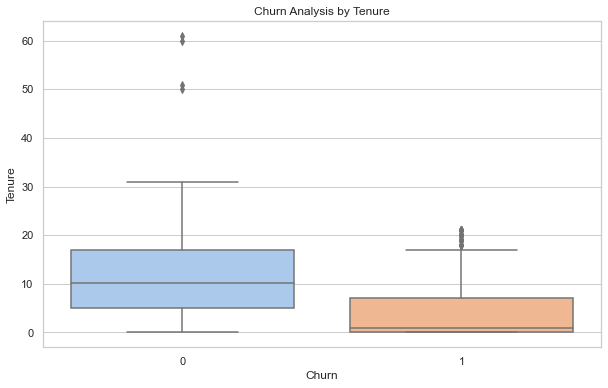

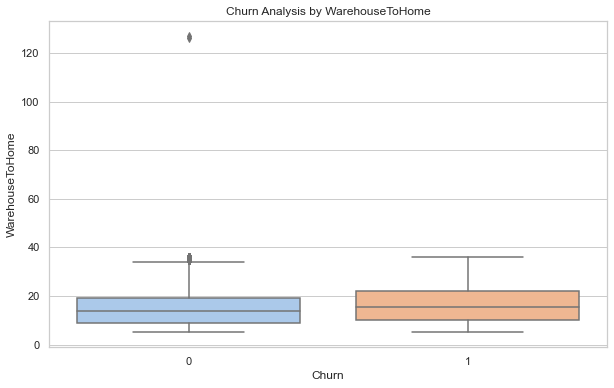

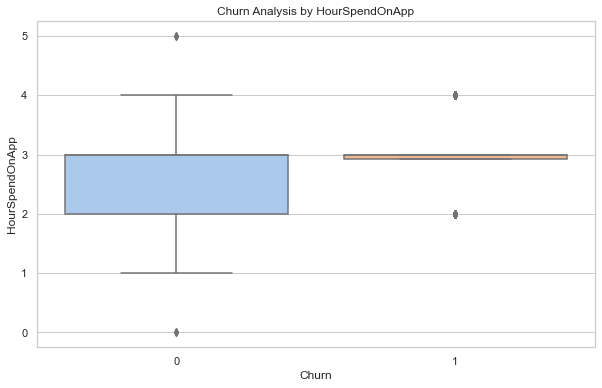

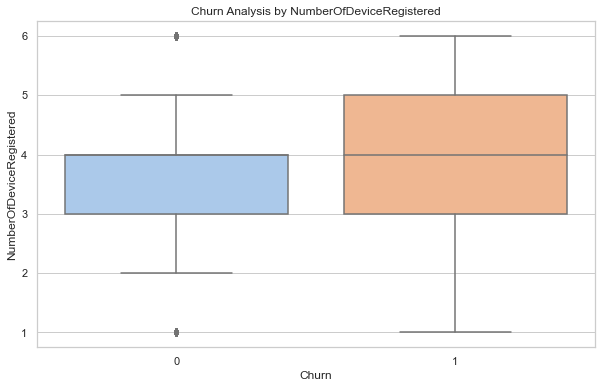

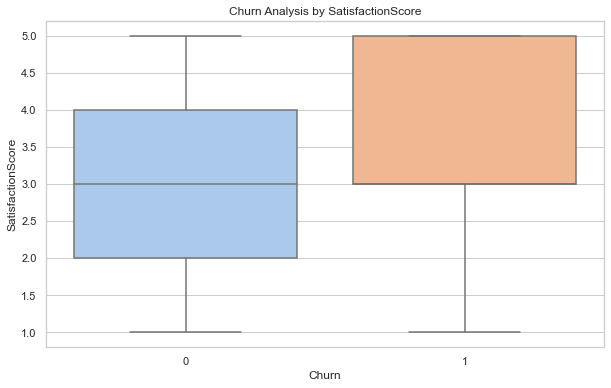

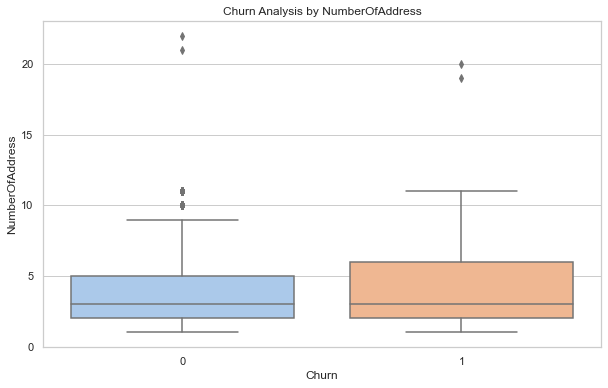

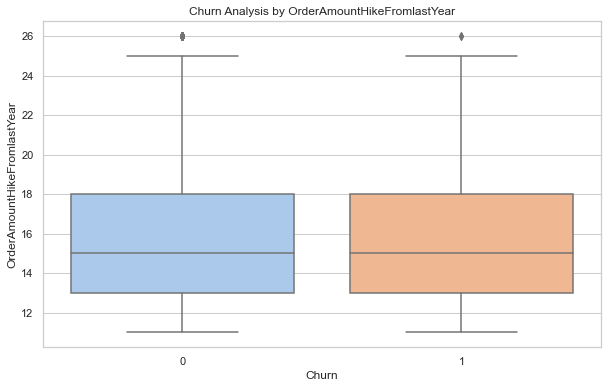

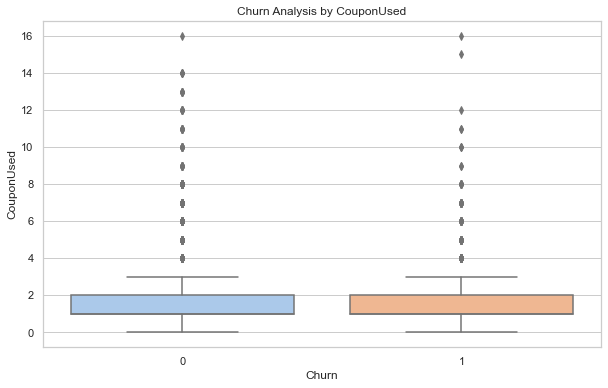

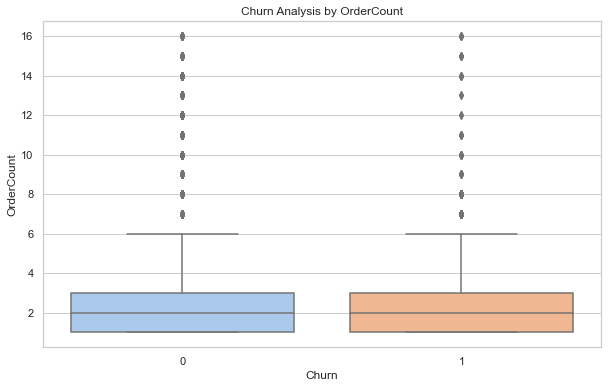

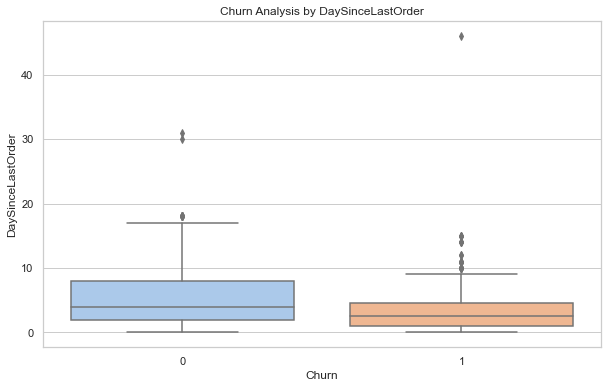

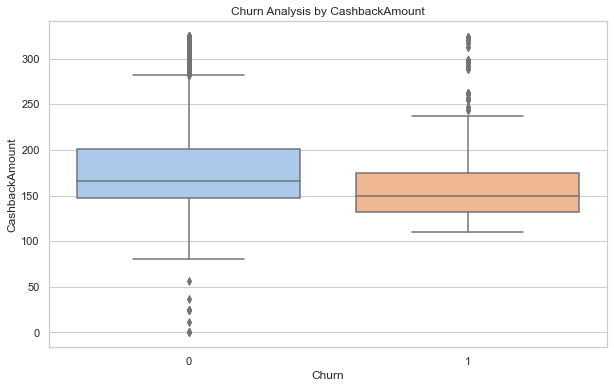

In [64]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Function to plot churn analysis for categorical variables
def plot_categorical_churn(variable):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=variable, hue='Churn', data=df1, palette='pastel')
    plt.title(f'Churn Analysis by {variable}')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
    plt.show()

# Function to plot churn analysis for numerical variables
def plot_numerical_churn(variable):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Churn', y=variable, data=df1, palette='pastel')
    plt.title(f'Churn Analysis by {variable}')
    plt.xlabel('Churn')
    plt.ylabel(variable)
    plt.show()

# Analyze Churn by each variable
categorical_vars = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Complain']
numerical_vars = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

for var in categorical_vars:
    plot_categorical_churn(var)

for var in numerical_vars:
    plot_numerical_churn(var)